<a href="https://colab.research.google.com/github/malaikabasharat004/first/blob/main/supervision_0_24_0_promo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Supervision 0.24.0 promo

### Install dependencies

In [ ]:
!pip install -q ultralytics supervision

In [ ]:
import supervision as sv
print(sv.__version__)

0.24.0


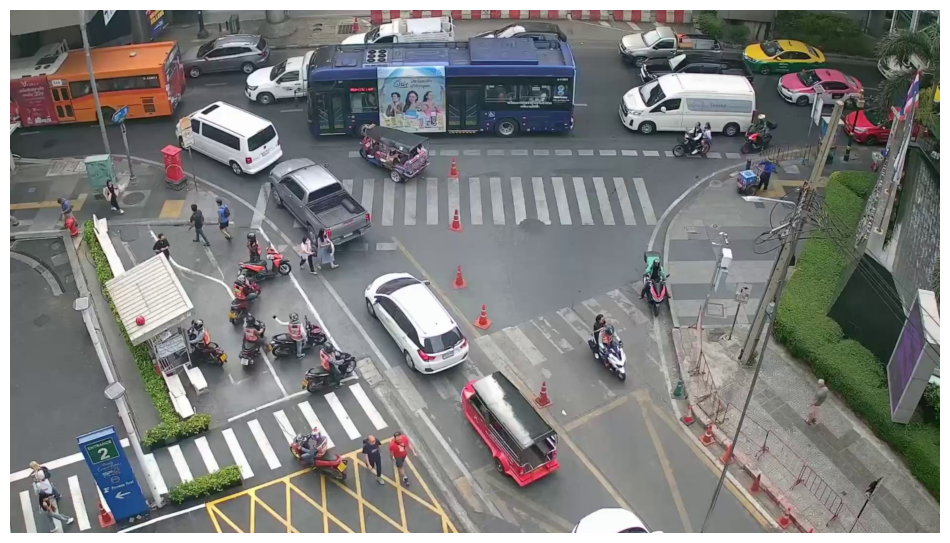

In [ ]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/supervision-0.24.0-promo.mp4"

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

sv.plot_image(frame)

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11x.pt")

In [ ]:
CLASS_MAPPING = {
    2: 0,
    3: 1,
    5: 2,
    7: 3
}

## detection

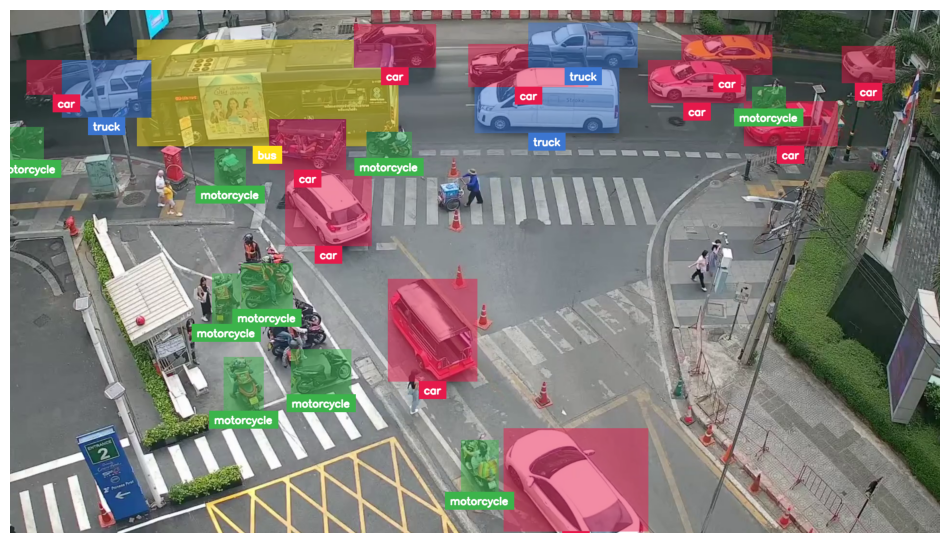

In [ ]:
import numpy as np
import supervision as sv

SOURCE_VIDEO_PATH = "/content/supervision-0.24.0-promo.mp4"

COLORS = sv.ColorPalette.from_hex(["#E6194B", "#3CB44B", "#FFE119", "#3C76D1"])
COLOR_ANNOTATOR = sv.ColorAnnotator(color=COLORS)
LABEL_ANNOTATOR = sv.LabelAnnotator(
    color=COLORS,
    text_scale=0.7,
    text_thickness=2,
    text_position=sv.Position.BOTTOM_CENTER
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=60 * 10)
frame = next(frame_generator)

result = model(frame, conf=0.35, imgsz=1280, verbose=False)[0]
detections = sv.Detections.from_ultralytics(result)
detections = detections.with_nms(class_agnostic=True)
detections = detections[detections.class_id != 0]
custom_color_lookup = np.array([
    CLASS_MAPPING[class_id]
    for class_id
    in detections.class_id
])

annotated_frame = frame.copy()
annotated_frame = COLOR_ANNOTATOR.annotate(
    annotated_frame, detections,
    custom_color_lookup=custom_color_lookup)
annotated_frame = LABEL_ANNOTATOR.annotate(
    annotated_frame, detections,
    custom_color_lookup=custom_color_lookup)

sv.plot_image(annotated_frame)

## zones

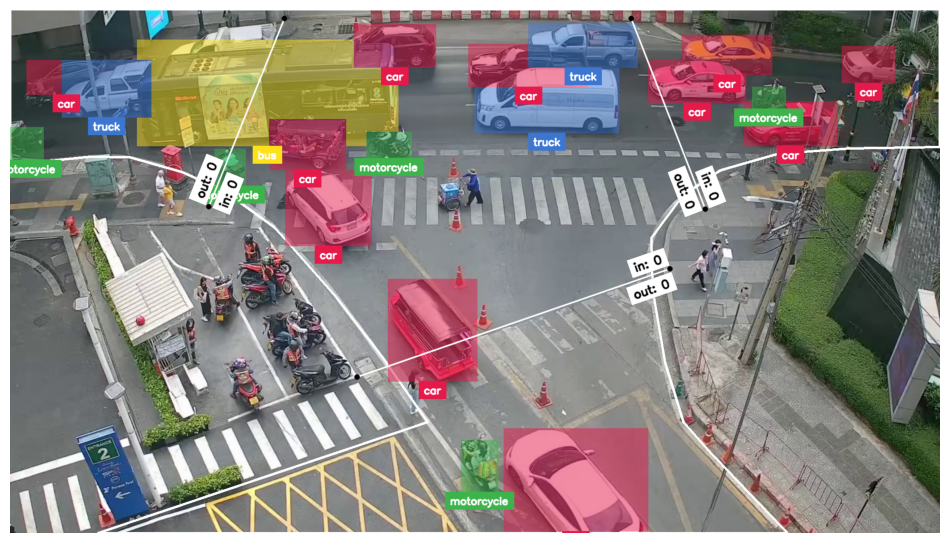

In [ ]:
import numpy as np
import supervision as sv

COLORS = sv.ColorPalette.from_hex(["#E6194B", "#3CB44B", "#FFE119", "#3C76D1"])

LINE_1_START = sv.Point(566, 19)
LINE_1_END = sv.Point(410, 407)

LINE_2_START = sv.Point(716, 758)
LINE_2_END = sv.Point(1362, 535)

LINE_3_START = sv.Point(1282, 19)
LINE_3_END = sv.Point(1435, 412)

POLYGON = np.array([
    [246,  305 ],
    [353,  335 ],
    [439,  373 ],
    [546,  450 ],
    [671,  591 ],
    [769,  718 ],
    [862,  851 ],
    [181,  1080],
    [1038, 1080],
    [1605, 1080],
    [1446, 914 ],
    [1390, 851 ],
    [1352, 728 ],
    [1326, 576 ],
    [1324, 471 ],
    [1388, 385 ],
    [1466, 332 ],
    [1585, 298 ],
    [1731, 287 ],
    [1919, 284 ],
    [1919, 0   ],
    [0,    0   ],
    [0,    321 ],
    [165,  304 ]
])

LINE_ZONE_1 = sv.LineZone(
    start=LINE_1_START,
    end=LINE_1_END,
    triggering_anchors=(sv.Position.BOTTOM_CENTER,)
)

LINE_ZONE_2 = sv.LineZone(
    start=LINE_2_START,
    end=LINE_2_END,
    triggering_anchors=(sv.Position.BOTTOM_CENTER,)
)

LINE_ZONE_3 = sv.LineZone(
    start=LINE_3_START,
    end=LINE_3_END,
    triggering_anchors=(sv.Position.BOTTOM_CENTER,)
)

POLYGON_ZONE = sv.PolygonZone(
    polygon=POLYGON,
    triggering_anchors=(sv.Position.CENTER,)
)

LINE_ZONE_ANNOTATOR = sv.LineZoneAnnotator(
    text_scale=0.8,
    text_orient_to_line=True,
    display_text_box=True,
    text_centered=False
)

COLOR_ANNOTATOR = sv.ColorAnnotator(color=COLORS)
LABEL_ANNOTATOR = sv.LabelAnnotator(
    color=COLORS,
    text_scale=0.7,
    text_thickness=2,
    text_position=sv.Position.BOTTOM_CENTER
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=60 * 10)
frame = next(frame_generator)

result = model(frame, conf=0.35, imgsz=1280, verbose=False)[0]
detections = sv.Detections.from_ultralytics(result)
detections = detections.with_nms(class_agnostic=True)
detections = detections[detections.class_id != 0]
detections = detections[POLYGON_ZONE.trigger(detections)]
custom_color_lookup = np.array([
    CLASS_MAPPING[class_id]
    for class_id
    in detections.class_id
])

annotated_frame = frame.copy()
annotated_frame = sv.draw_polygon(
    scene=annotated_frame,
    polygon=POLYGON,
    color=sv.Color.WHITE,
    thickness=3
)

annotated_frame = COLOR_ANNOTATOR.annotate(
    annotated_frame, detections,
    custom_color_lookup=custom_color_lookup)
annotated_frame = LABEL_ANNOTATOR.annotate(
    annotated_frame, detections,
    custom_color_lookup=custom_color_lookup)

annotated_frame = LINE_ZONE_ANNOTATOR.annotate(
    frame=annotated_frame, line_counter=LINE_ZONE_1
)
annotated_frame = LINE_ZONE_ANNOTATOR.annotate(
    frame=annotated_frame, line_counter=LINE_ZONE_2
)
annotated_frame = LINE_ZONE_ANNOTATOR.annotate(
    frame=annotated_frame, line_counter=LINE_ZONE_3
)

sv.plot_image(annotated_frame)

## video

In [ ]:
import numpy as np
import supervision as sv
from tqdm import tqdm

SOURCE_VIDEO_PATH = "/content/supervision-0.24.0-promo.mp4"
TARGET_VIDEO_PATH = "/content/supervision-0.24.0-promo-result.mp4"
COLORS = sv.ColorPalette.from_hex(["#E6194B", "#3CB44B", "#FFE119", "#3C76D1"])

LINE_1_START = sv.Point(566, 19)
LINE_1_END = sv.Point(410, 407)

LINE_2_START = sv.Point(716, 758)
LINE_2_END = sv.Point(1362, 535)

LINE_3_START = sv.Point(1282, 19)
LINE_3_END = sv.Point(1435, 412)

POLYGON = np.array([
    [246,  305 ],
    [353,  335 ],
    [439,  373 ],
    [546,  450 ],
    [671,  591 ],
    [769,  718 ],
    [862,  851 ],
    [181,  1080],
    [1038, 1080],
    [1605, 1080],
    [1446, 914 ],
    [1390, 851 ],
    [1352, 728 ],
    [1326, 576 ],
    [1324, 471 ],
    [1388, 385 ],
    [1466, 332 ],
    [1585, 298 ],
    [1731, 287 ],
    [1919, 284 ],
    [1919, 0   ],
    [0,    0   ],
    [0,    321 ],
    [165,  304 ]
])

LINE_ZONE_1 = sv.LineZone(
    start=LINE_1_START,
    end=LINE_1_END,
    triggering_anchors=(sv.Position.BOTTOM_CENTER,)
)

LINE_ZONE_2 = sv.LineZone(
    start=LINE_2_START,
    end=LINE_2_END,
    triggering_anchors=(sv.Position.BOTTOM_CENTER,)
)

LINE_ZONE_3 = sv.LineZone(
    start=LINE_3_START,
    end=LINE_3_END,
    triggering_anchors=(sv.Position.BOTTOM_CENTER,)
)

POLYGON_ZONE = sv.PolygonZone(
    polygon=POLYGON,
    triggering_anchors=(sv.Position.CENTER,)
)

LINE_ZONE_ANNOTATOR = sv.LineZoneAnnotator(
    text_scale=0.8,
    text_orient_to_line=True,
    display_text_box=True,
    text_centered=False
)

LINE_ZONE_ANNOTATOR_MULTICLASS = sv.LineZoneAnnotatorMulticlass(
    text_scale=0.8,
    text_thickness=2,
    table_margin=20
)

COLOR_ANNOTATOR = sv.ColorAnnotator(color=COLORS)
LABEL_ANNOTATOR = sv.LabelAnnotator(
    color=COLORS,
    text_scale=0.7,
    text_thickness=2,
    text_position=sv.Position.BOTTOM_CENTER
)
TRACK_ANNOTATOR = sv.TraceAnnotator(
    color=COLORS,
    trace_length=60 * 2
)

TRACKER = sv.ByteTrack(minimum_consecutive_frames=5)
TRACKER.reset()

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=60 * 10, end=60 * 70)
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

with video_sink:
    for frame_idx, frame in tqdm(enumerate(frame_generator)):

        result = model(frame, conf=0.35, imgsz=1280, verbose=False)[0]
        detections = sv.Detections.from_ultralytics(result)
        detections = detections.with_nms(class_agnostic=True)
        detections = detections[np.isin(detections.class_id, [2, 3, 5, 7])]
        detections = detections[POLYGON_ZONE.trigger(detections)]
        detections = TRACKER.update_with_detections(detections)

        custom_color_lookup = np.array([
            CLASS_MAPPING[class_id]
            for class_id
            in detections.class_id
        ])

        labels = [
            f"{class_name} {confidence:.2f}"
            for class_name, confidence
            in zip(detections["class_name"], detections.confidence)
        ]

        LINE_ZONE_1.trigger(detections)
        LINE_ZONE_2.trigger(detections)
        LINE_ZONE_3.trigger(detections)

        annotated_frame = frame.copy()
        annotated_frame = sv.draw_polygon(
            scene=annotated_frame,
            polygon=POLYGON,
            color=sv.Color.WHITE,
            thickness=3
        )

        annotated_frame = COLOR_ANNOTATOR.annotate(
            annotated_frame, detections,
            custom_color_lookup=custom_color_lookup)
        annotated_frame = LABEL_ANNOTATOR.annotate(
            annotated_frame, detections,
            custom_color_lookup=custom_color_lookup, labels=labels)
        annotated_frame = TRACK_ANNOTATOR.annotate(
            annotated_frame, detections,
            custom_color_lookup=custom_color_lookup)

        annotated_frame = LINE_ZONE_ANNOTATOR.annotate(
            frame=annotated_frame, line_counter=LINE_ZONE_1
        )
        annotated_frame = LINE_ZONE_ANNOTATOR.annotate(
            frame=annotated_frame, line_counter=LINE_ZONE_2
        )
        annotated_frame = LINE_ZONE_ANNOTATOR.annotate(
            frame=annotated_frame, line_counter=LINE_ZONE_3
        )
        annotated_frame = LINE_ZONE_ANNOTATOR_MULTICLASS.annotate(
            frame=annotated_frame,
            line_zones=[LINE_ZONE_1, LINE_ZONE_2, LINE_ZONE_3]
        )

        video_sink.write_frame(annotated_frame)

3600it [10:46,  5.57it/s]
